## In this notebook I will look at the Iris data set.

This seems to be a clean and simple data set. I will use this to brush up on my Machine Learning and Python coding skills and see what I can get out of this.
So the first step would be to import the libraries that I might need and load the data here.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import math
import operator

In [2]:
data = pd.read_csv('./iris.csv') #importing the data

The actual data was downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
My problem was that I could not remember how to load .data files and I didn't want to waste so much time at this moment. As a result, I decided to change the extension of the file in linux via the following command:
mv iris.data iris.csv
And it seems to work perfectly fine!

In [3]:
data.head(5) #looking at first 5 rows of the data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


I am not sure what any of theses columns mean. OK here is what the website says:

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica


In [4]:
print(len(data.columns))
#data = pd.read_csv("./iris.csv", sep='\t', header = None)
#data.columns = ["sepal_lenght", "sepal_width", "pedal_length", "pedal_width", "class"]
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv("./iris.csv", sep=',', names = names)
data.head(5)

5


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first thing to do, is to replace the name of the flowers. I want to make sure that there is no null value anywhere and we only have these 3 categories of flowers.

In [5]:
data.isnull().any(axis=0) # I found that there is no null value anywhere! pretty clean data!

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

In [6]:
data['class'].unique() #make sure that there are only 3 types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.replace (['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] , [1, 2, 3], inplace=True)

In [8]:
#data['class_value'] = 0
#if data['class'] == "Iris-setosa":
 #   data['class_value']=1
#data.loc[data['class'] = 1, 'class_value'] = 1
#data.loc[data['class'] = 2, 'class_value'] = 2
#data.loc[data['class'] = 3, 'class_value']=3
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


([<matplotlib.axis.XTick at 0x7f12616adf10>,
 <a list of 3 Text xticklabel objects>)

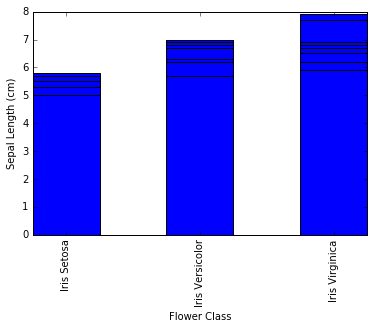

In [9]:
width = 0.5
plot1 =plt.bar(data['class'],  data['sepal_length'], width)
plt.xlabel('Flower Class')
plt.ylabel('Sepal Length (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')

#This shows that the length is larger for the 3rd class or Iris Virginica

([<matplotlib.axis.XTick at 0x7f12612941d0>,
 <a list of 3 Text xticklabel objects>)

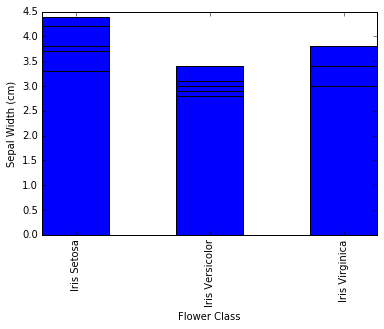

In [10]:
plot1 =plt.bar(data['class'],  data['sepal_width'], width)
plt.xlabel('Flower Class')
plt.ylabel('Sepal Width (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')

([<matplotlib.axis.XTick at 0x7f12616e9f50>,
 <a list of 3 Text xticklabel objects>)

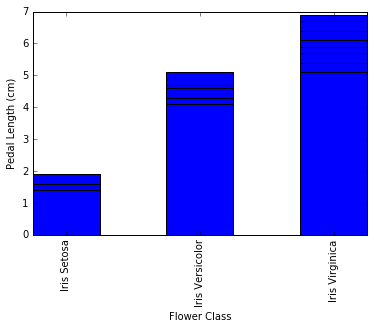

In [11]:
plot1 =plt.bar(data['class'],  data['petal_length'], width)
plt.xlabel('Flower Class')
plt.ylabel('Pedal Length (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')

([<matplotlib.axis.XTick at 0x7f125d923750>,
 <a list of 3 Text xticklabel objects>)

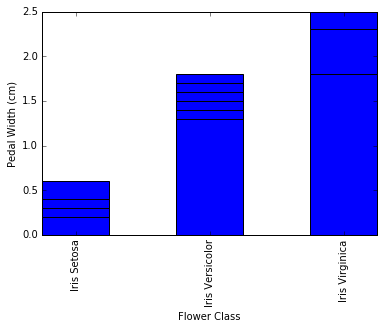

In [12]:
plot1 =plt.bar(data['class'],  data['petal_width'], width)
plt.xlabel('Flower Class')
plt.ylabel('Pedal Width (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')

In [13]:
max_sepal_length = max(data['sepal_length'])
min_sepal_length = min(data['sepal_length'])
center_sepal_length = (max_sepal_length - min_sepal_length)/2


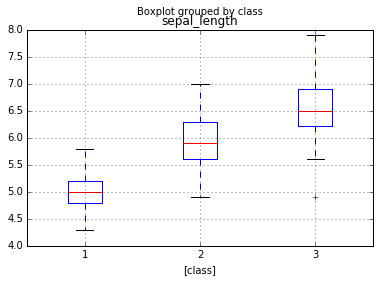

In [17]:
boxplot1 = data.boxplot(['sepal_length'] , ['class'])

In [15]:
#sns.set_style("whitegrid")
#sns.boxplot(x = data['class'], y = data['sepal_length'] )

## Interesting thing I found!! When seaborn is imported, matplotlib deos not show boxplot fliers!!! Once I commented seaborn import out, it worked fine!!

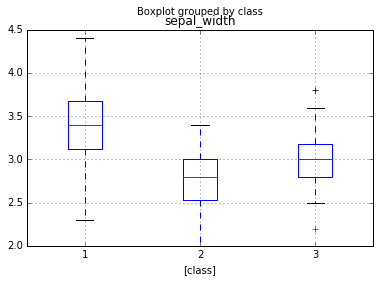

In [19]:
boxplot2 = data.boxplot(['sepal_width'] , ['class'])

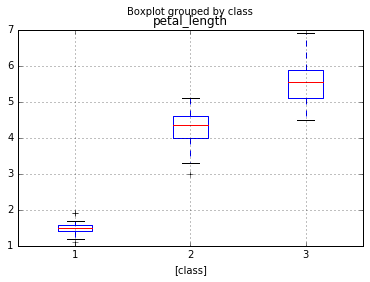

In [20]:
boxplot3 = data.boxplot(['petal_length'] , ['class'])

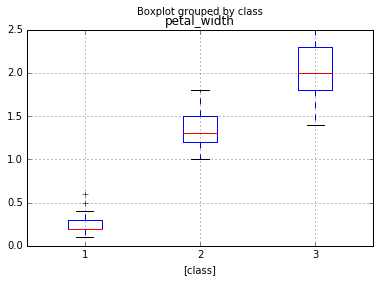

In [21]:
boxplot4 = data.boxplot(['petal_width'] , ['class'])

Summary of all of these plots so far:
Here I right the length in cm in the descending order
sepal length : 1 > 2 > 3
sepal width : 1 > 3 > 2
petal length : 3 > 2 > 1
petal width : 3 > 2 > 1

Now I want to set my data set to train and test so that I can use some classification algorithms and test how good/bad I am doing.

In [166]:
y = data['class']
x = data.drop('class', axis=1)
#print x
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# 20 % of the data is test data and 80 percent is train data

In [167]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(120, 4) (120,)
(30, 4) (30,)


Since this is a multilabel classification problem, I will use kNN algorithm.

## Important point: I cannot use accuracy to see how well my model worked. It only works with classification models and not regression

[1 3 3 2 1 1 2 1 3 3 1 2 2 1 3 1 1 3 3 1 2 3 1 2 2 2 3 3 1 3]
93.33


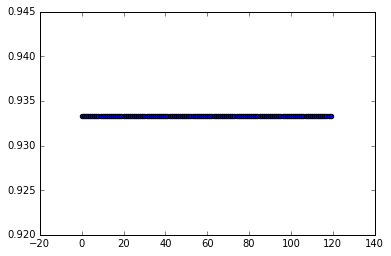

In [171]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print predictions
accuracy = accuracy_score(y_test, predictions)
print round(accuracy*100 ,2)


In [169]:
cm = confusion_matrix(y_test, predictions)
print cm

[[11  0  0]
 [ 0  6  0]
 [ 0  2 11]]


In [183]:
#xlength = len(X_train)
#accuracyArray = []
#kArray = []
#for x in range (xlength):
#    kArray.append(x)
#    model = KNeighborsClassifier(n_neighbors = x)
#    predictions = model.predict(X_test)
#    accuracy = accuracy_score(y_test,predictions)
#    accuracyArray.append(accuracy)

#plt.scatter(kArray, accuracyArray)

In [186]:
# creating list of K for KNN
kList = list(range(1,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in kList:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

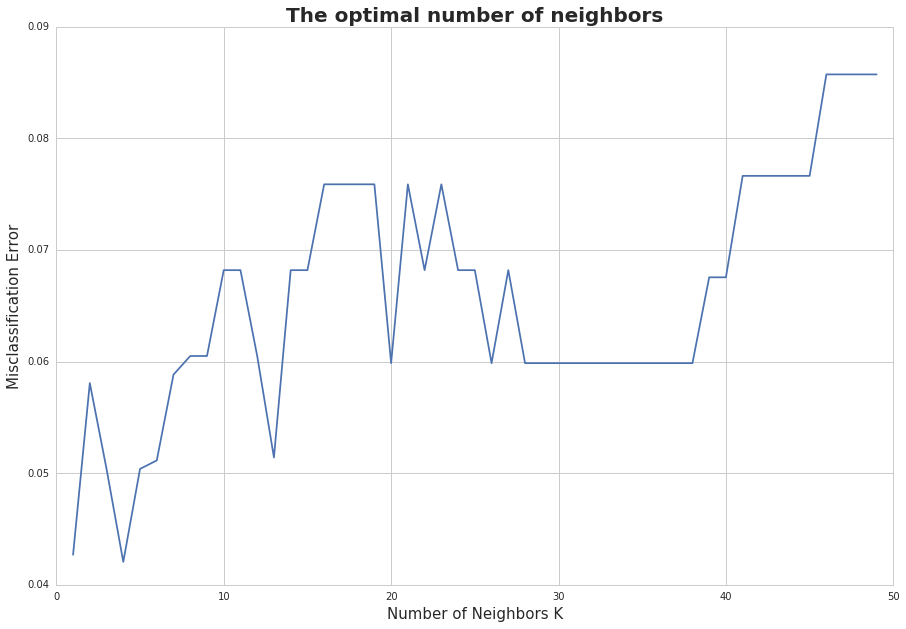

In [188]:
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(kList, MSE)

plt.show()

In [182]:
# finding best k
best_k = kList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.
